Importing Libraries 


In [27]:
import numpy as np
import sep
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import rcParams

Importing image and converting to native byte order for SEP - Image downloaded in code due to image downloading as corrupt when downloaded to my files then pulled

In [28]:
import urllib.request

url = "https://archive.stsci.edu/pub/hlsp/hudf12/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"
filename = "hubble_udf_f105w.fits"

urllib.request.urlretrieve(url, filename)

print("Download complete:", filename)

%matplotlib inline
rcParams['figure.figsize'] = [10., 8.]

with fits.open("hubble_udf_f105w.fits") as hdul:
    data = hdul[0].data

# Convert to proper format for SEP later (does NOT change image content)
data = np.ascontiguousarray(data, dtype=np.float32)

Download complete: hubble_udf_f105w.fits


Image Display

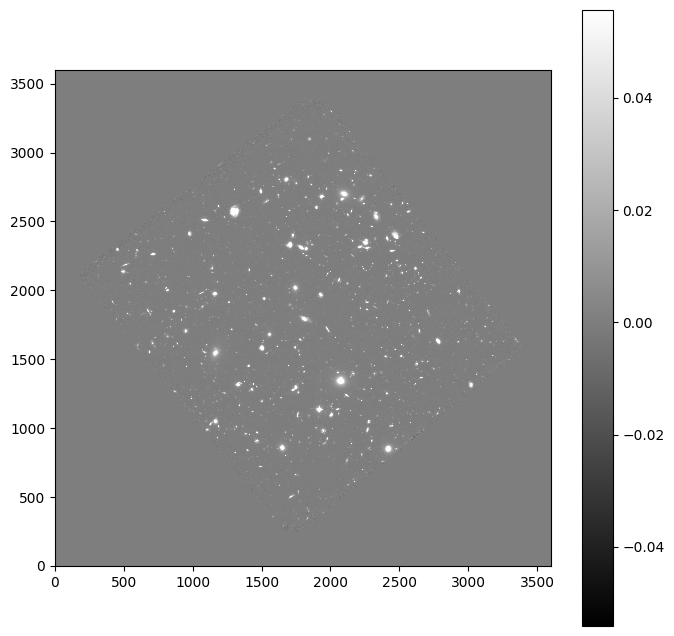

In [29]:
m, s = np.mean(data), np.std(data)

plt.figure(figsize=(8, 8))
plt.imshow(data, interpolation='nearest',
           cmap='gray',
           vmin=m-s,
           vmax=m+s,
           origin='lower')

plt.colorbar()
plt.savefig("data2.png")
plt.show()

Background Estimation

In [30]:
bkg = sep.Background(data)

print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


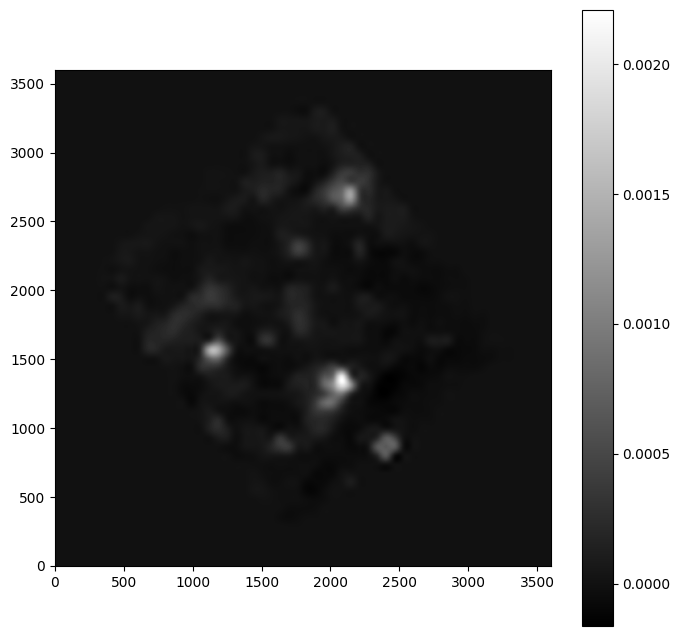

In [31]:
bkg_image = bkg.back()

plt.figure(figsize=(8, 8))
plt.imshow(bkg_image, interpolation='nearest',
           cmap='gray',
           origin='lower')
plt.colorbar()
plt.savefig("background2.png")
plt.show()

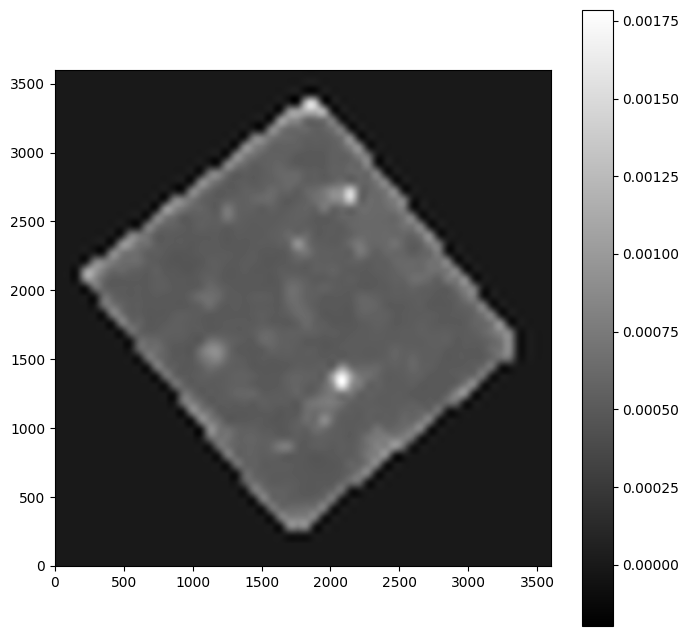

In [32]:
bkg_rms = bkg.rms()

plt.figure(figsize=(8, 8))
plt.imshow(bkg_rms, interpolation='nearest',
           cmap='gray',
           origin='lower')
plt.colorbar()
plt.savefig("backgroundNoise2.png")
plt.show()

In [33]:
data_sub = data - bkg


Extracting and Plotting Objects

In [34]:
objects = sep.extract(data_sub, thresh=1.5, err=bkg.globalrms)

print("Number of objects detected:", len(objects))

Number of objects detected: 8630


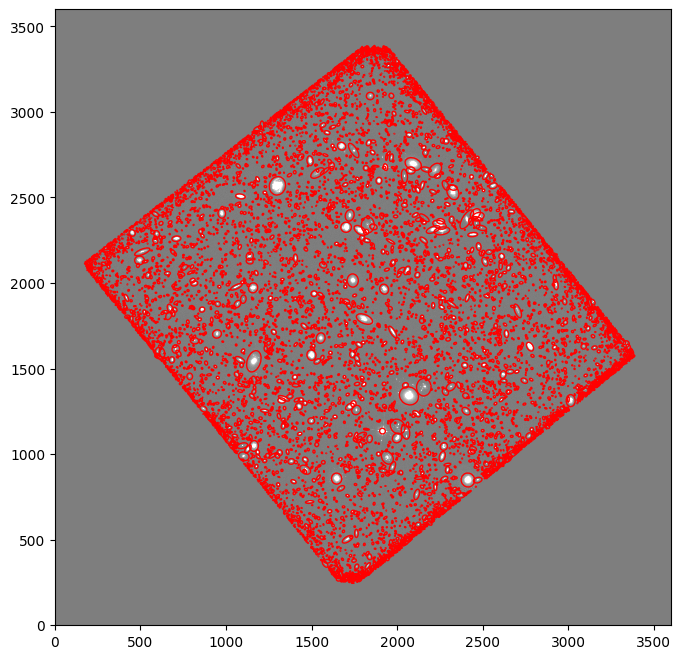

<Figure size 800x800 with 0 Axes>

In [35]:
from matplotlib.patches import Ellipse

# Plot background-subtracted image with proper scaling
fig, ax = plt.subplots()

plt.figure(figsize=(8, 8))
m, s = np.mean(data_sub), np.std(data_sub)

ax.imshow(data_sub,
          interpolation='nearest',
          cmap='gray',
          vmin=m - s,
          vmax=m + s,
          origin='lower')

# Plot ellipses
for i in range(len(objects)):
    e = Ellipse(
        xy=(objects['x'][i], objects['y'][i]),
        width=6 * objects['a'][i],
        height=6 * objects['b'][i],
        angle=objects['theta'][i] * 180. / np.pi
    )
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig("objects2.png")
plt.show()

Creating Table of First 10 objects in list. Completed after Performing Circular Aperture Photometry with 3 Pixel Fadius at Object Location

In [36]:
flux, fluxerr, flag = sep.sum_circle(
    data_sub,
    objects['x'],
    objects['y'],
    3.0,
    err=bkg.globalrms,
    gain=1.0
)

for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877
